<a href="https://colab.research.google.com/github/LamuneGitHub/A001_Python_Test/blob/main/sprint/ai15-sc13x-%EC%9D%B4%EC%83%81%ED%95%84-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='https://i.imgur.com/RDAD11M.png' width = '200' align = 'right'>

# **SC13x** 

# **Linear Algebra**

## **Part 1. Linear Algebra**

### **1-1. 벡터의 내적**

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

</br>

- $\vec{c} \cdot \vec{d}$ 를 구해보세요. 
- 이 두 개의 vector가 orthogonal 관계 (직교)에 있는지 확인해보세요.

##### **Q1. 두 벡터 c, d가 orthogonal 관계(직교)에 있다면 왜 그런지, 아니라면 왜 아닌지 쓰세요.**

In [18]:
from IPython.display import display

import re
import math
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import random

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [19]:
v_c = np.array ( [3 , 7 , -2 , 12 ] )
v_d = np.array ( [9 , -7 , 4 , 6 ] )

print ( np.dot( v_c , v_d))


42


두 벡터의 내적이 0이 아니므로 직교가 아니다. 

### **1-2. 행렬의 연산**


\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

</br>

- $E^{-1}$, $E^T$을 구하세요.





##### **Q2. $E^{-1}$의 첫번째 row의 합을 반올림하여 소수점 둘째 자리까지 구한 값과 $E^T$의 첫번째 row의 합을 튜플 형태로 쓰세요. ex) (0.12, 22)** 

In [20]:
m_E = np.array ( [
      [7,4,2],
      [1,3, -1],
      [2,6, -4]
     ] )

m_E_inv = np.linalg.inv(m_E)
m_E_T = m_E.T

display ( m_E )
display ( m_E_T )
display ( m_E_inv )

print ( (m_E_inv[0].sum().round(2) ,  m_E_T[0].sum() ))

array([[ 7,  4,  2],
       [ 1,  3, -1],
       [ 2,  6, -4]])

array([[ 7,  1,  2],
       [ 4,  3,  6],
       [ 2, -1, -4]])

array([[ 0.17647059, -0.82352941,  0.29411765],
       [-0.05882353,  0.94117647, -0.26470588],
       [ 0.        ,  1.        , -0.5       ]])

(-0.35, 10)


### **1-3. Determinant**

행렬 $F$ 를 활용하여 다음 `Q3` 질문에 답해봅니다.

</br>

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}



 



##### **Q3. $det F$ 값을 바탕으로 행렬 $F$ 에는 어떤 의미가 있는지 쓰세요.**

In [21]:
m_F = np.array ( [
      [2, -2, 5],
      [4, 1, 10],
      [12, 6, 30 ]
     ] )

det_F = np.linalg.det(m_F)
print (det_F)

0.0


행렬식의 값이 0 이므로 역행렬이 존재하지 않는다.

## **Part 2. PCA**

### **2-1. Covariance & Correlation**

- 다음 표를 보고 `S&P 500`과 `ABC Corp.`의 공분산과 상관계수를 구하세요.

  <img src='https://i.imgur.com/QBCt8yx.png' width=500>

##### **Q4. 공분산과 상관계수를 각각 반올림하여 소수점 둘째 자리까지 구하여 (공분산, 상관계수)의 형태로 쓰세요.** 

In [22]:
df = pd.DataFrame(
    {
      "snp" : [1692 ,1978, 1884, 2151, 2519],
      "abc" : [68 , 102, 110, 112, 154]
    }
)

display( df.cov() )
display( df.corr() )

print(( df.cov()['snp']['abc'].round(2) , df.corr()['snp']['abc'].round(2) ))

,snp,abc
snp,97732.7,9107.3
abc,9107.3,941.2


,snp,abc
snp,1.000000,0.949574
abc,0.949574,1.000000


(9107.3, 0.95)


### **2-2. PCA**




#### **2-2-a. 데이터 표준화** 

- `Country` column을 `country` 라는 변수에 저장하세요.
- 다음 [링크](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)를 참고하여 `df`의 numerical columns에 대해 표준화를 진행하세요.




##### **Q5. 표준화 한 후, `Sugars` column의 index가 0인 값을 반올림하여 소수점 둘째 자리까지 구하세요.**

In [23]:
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

df

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [24]:
# Country column을 country 라는 변수에 저장하세요.

country = df['Country']
country


0          England
1            Wales
2         Scotland
3    North Ireland
Name: Country, dtype: object

In [25]:
# 컬럼 drop
df = df.drop( columns = 'Country' )
df.head(5)

# 표준화
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
Z = scaler.fit_transform(df)
print("\n Standardized Data: \n", Z)



 Standardized Data: 
 [[ 0.65827466 -0.01749546 -0.25954622  0.64458535 -0.63242919  0.13055067
  -0.45007561  0.86331183  0.37773603 -0.33626508  0.80547723  0.73740709
  -0.64432226 -0.05191741 -0.43523112  0.10499766 -0.13830319]
 [ 0.53580495 -1.27716878  1.19885635  1.15244047  1.53589947  1.54795798
   0.43569619  1.09352832  1.40168163  0.08406627  1.17160324  0.9292974
   1.67946294  1.60943981 -1.40423624  0.84182336  0.96812236]
 [ 0.53580495 -0.22744102  0.54381113 -0.33205912 -1.09707105 -0.54085279
  -1.33584741 -0.70983418 -0.49636387  1.51319287 -0.87870243 -0.0575671
  -0.85557546 -0.46725672  1.19072664  0.71656299  0.74683725]
 [-1.72988456  1.52210526 -1.48312126 -1.4649667   0.19360077 -1.13765587
   1.35022682 -1.24700598 -1.28305378 -1.26099406 -1.09837804 -1.60913739
  -0.17956522 -1.09026568  0.64874072 -1.66338402 -1.57665641]]


In [26]:
# df 화
df_std = pd.DataFrame( Z )
df_std.columns = df.columns
df_std

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,0.658275,-0.017495,-0.259546,0.644585,-0.632429,0.130551,-0.450076,0.863312,0.377736,-0.336265,0.805477,0.737407,-0.644322,-0.051917,-0.435231,0.104998,-0.138303
1,0.535805,-1.277169,1.198856,1.152440,1.535899,1.547958,0.435696,1.093528,1.401682,0.084066,1.171603,0.929297,1.679463,1.609440,-1.404236,0.841823,0.968122
2,0.535805,-0.227441,0.543811,-0.332059,-1.097071,-0.540853,-1.335847,-0.709834,-0.496364,1.513193,-0.878702,-0.057567,-0.855575,-0.467257,1.190727,0.716563,0.746837
3,-1.729885,1.522105,-1.483121,-1.464967,0.193601,-1.137656,1.350227,-1.247006,-1.283054,-1.260994,-1.098378,-1.609137,-0.179565,-1.090266,0.648741,-1.663384,-1.576656


In [27]:
# Sugars column의 index가 0인 값을 반올림하여 소수점 둘째 자리까지 구하세요.

print ( df_std.iloc[0]['Sugars'].round(2) )

0.13


#### **2-2-b. PCA**

표준화를 진행한 `df`에 PCA를 적용한 후 `scatterplot`을 그려봅니다.
- PCA 결과를 `pca_df`라는 이름의 데이터프레임으로 저장하세요.
  - PC의 개수는 2개 ~ 4개 사이로 지정하세요.
  - 각 column의 이름은 `PC1`, `PC2`...로 설정하세요.
- scatterplot의 x축에 `PC1`, y축에 `PC2`이 나타나도록 하세요.
- scatterplot의 hue 파라미터를 `country`로 지정하세요. 

[0.68327871 0.24871288]
 필요한 PC 갯수 2 , 0.9319915970724626

 Projected Data: 
 [[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]


,country,PC1,PC2
0,England,-0.954490,0.328318
1,Wales,-4.520951,-1.735380
2,Scotland,0.487978,3.233672
3,North Ireland,4.987462,-1.826611


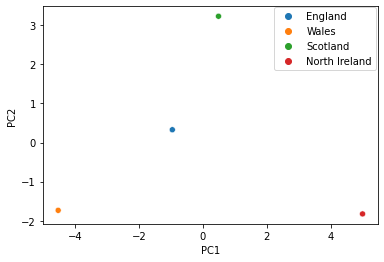

In [28]:
Z= df_std

# 필요한 pca 갯수 계산 

# 80% 이상을 만족하기 위해 필요한 PC 갯수
pca = PCA( n_components=0.8  ) 
pca.fit(Z)
print( pca.explained_variance_ratio_ )
print ( f" 필요한 PC 갯수 {len(pca.explained_variance_ratio_)} , {pca.explained_variance_ratio_.sum()}" )

# pca 갯수가 목표치인 2~4 이내에 들어와서 그대로 진행 

# pca 차원 축소 진행 
B = pca.transform(Z)
print("\n Projected Data: \n", B[:10]) # 10개만 출력

# PCA 진행된 결과 df 생성
pca_df = pd.DataFrame( {'country':country , 'PC1':B[:,0] , 'PC2':B[:,1] } )
display ( pca_df )

# 시각화
sns.scatterplot( data=pca_df , hue = 'country' , x='PC1', y='PC2')
plt.legend(bbox_to_anchor=(1.01, 1.02))
plt.show()

##### **Q6. `scatterplot`의 가장 왼쪽에 위치하고 있는 나라는 어디인가요?**

In [29]:
pca_df[ pca_df['PC1'] == pca_df['PC1'].min() ].country

1    Wales
Name: country, dtype: object

## **Part 3. Clustering**

### **3-1. K-Means Clustering**

아래 데이터에 대해 K-Means Clustering을 적용한 후, 그 결과를 seaborn 라이브러리의 `scatterplot`으로 시각화하세요.
- `n_clusters = 4`, `random_state = 42`를 제외한 다른 parameter는 default option을 사용합니다.
- `scatterplot`의 hue 파라미터를 설정하여, cluster 별로 데이터가 어디에 위치해 있는지 확인합니다.


##### **Q7. scatterplot에서 가장 우측 상단에 위치해 있는 cluster는 무엇인가요?**

In [30]:
points = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/sc13x/data.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [31]:
points.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       200 non-null    float64
 1   y       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [32]:
points.describe()

,x,y
count,200.000000,200.000000
mean,-2.323298,-3.422869
std,4.556513,5.580888
min,-10.118473,-11.095795
25%,-4.619520,-8.246848
50%,-3.373794,-5.307697
75%,-0.427175,3.360028
max,7.807885,5.883054


array([[-1.21526379e+00,  2.86037188e-04],
       [-2.70846217e-01, -6.21863006e-01],
       [ 4.68740475e-01, -1.12237346e+00],
       [-8.97263139e-01, -3.23536806e-01],
       [ 3.34265444e-01, -1.12837792e+00]])

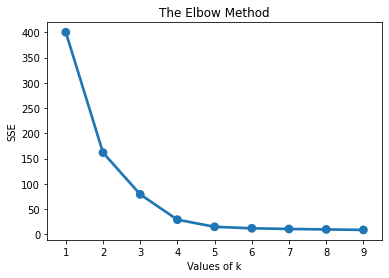

,cluster,x,y
0,0,-1.215264,0.000286
1,2,-0.270846,-0.621863
2,2,0.468740,-1.122373
3,0,-0.897263,-0.323537
4,2,0.334265,-1.128378
...,...,...,...
195,3,-0.272247,1.435299
196,1,1.622517,1.467231
197,1,1.859345,1.384618
198,2,0.118857,-0.982146


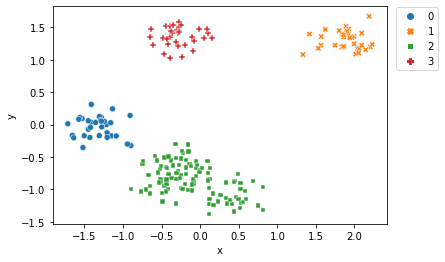

In [45]:
# 표준화
scaler = StandardScaler()
features = scaler.fit_transform(points)
display( features[:5] )

#elbow method를 이용하여 최적 cluster 갯수 확인
#
sse = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(features)
  sse[k] = kmeans.inertia_

# 결과 시각화
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# 최적의 클러스터 갯수는 4로 정함 

# 최종 모델 학습
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(features)

# cluster 구분 정보 저장
cluster_labels = kmeans.labels_
df_tmp_k4 = pd.DataFrame( {'cluster':cluster_labels , 'x':features[:,0] , 'y':features[:,1] } )
display ( df_tmp_k4 )

# 시각화
sns.scatterplot( data=df_tmp_k4 , hue = 'cluster' , x='x', y='y'  ,palette='tab10' ,style='cluster')
plt.legend(bbox_to_anchor=(1.01, 1.02))
plt.show()


우측 상단 = 1번 cluster

## **Part 4. 도전 과제**

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아래 **2개의 추가 조건들 중 하나**를 만족하는 경우 3점을 얻을 수 있습니다.

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)



### **4-1. Scree plot** 




#### **`2-2-b.`에서 진행한 PCA 결과에 대해서 `Scree plot`을 추가하세요.**

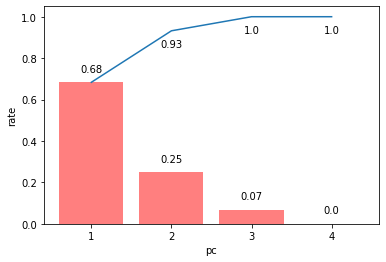

In [34]:
Z= df_std

# 필요한 pca 갯수 계산  , 최대 갯수는 4로 지정 
pca = PCA( n_components=4  ) 
pca.fit(Z)

# scree plot 
#

# var ratio bar 차트
plt.bar(range(1, 5), pca.explained_variance_ratio_, alpha=0.5, color='r')

# 꺽은선 그래프  , 누적
plt.plot(range(1, 5), np.cumsum(pca.explained_variance_ratio_))

# x 축 값을 수동 지정
plt.xticks([1, 2, 3, 4])


for i in range(1, 5):

    # 막대 그래프에 값 표시 
    plt.text(i, pca.explained_variance_ratio_[i-1]+0.05,
             pca.explained_variance_ratio_[i-1].round(2),
             horizontalalignment='center')
    
    if i > 1:
        # 꺽은선 그래프에 누적값 표시
        plt.text(i, np.cumsum(pca.explained_variance_ratio_)[i-1]-0.08,
                 np.cumsum(pca.explained_variance_ratio_)[i-1].round(2),
                 horizontalalignment='center')
        
# label 
plt.xlabel("pc")
plt.ylabel("rate")

plt.show()

### **4-2. Elbow Methods**



#### **Elbow Methods를 활용하여 `Part 3. Clustering`에서 최적의 k값을 선택하는 과정을 논리적으로 설명하세요.**


array([[-1.21526379e+00,  2.86037188e-04],
       [-2.70846217e-01, -6.21863006e-01],
       [ 4.68740475e-01, -1.12237346e+00],
       [-8.97263139e-01, -3.23536806e-01],
       [ 3.34265444e-01, -1.12837792e+00]])

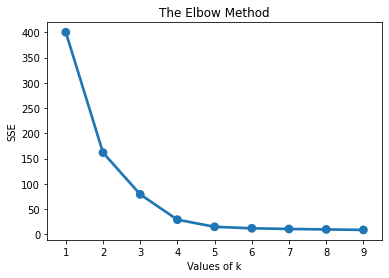

In [35]:
# 표준화
scaler = StandardScaler()
features = scaler.fit_transform(points)
display( features[:5] )

#elbow method를 이용하여 최적 cluster 갯수 확인
#
sse = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, random_state=1)
  kmeans.fit(features)
  sse[k] = kmeans.inertia_

# 결과 시각화
plt.title('The Elbow Method')
plt.xlabel('Values of k')
plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

# 최적의 클러스터 갯수는 4로 정함 

clustet 4개 위치가 기울기가 가장 크게 변화하는 변곡점임 -> 이 이상은 cluster를 늘려도 효율이 크게 올라가지 않음
